In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fenics as fe

import sys

sys.path.insert(0, "./scripts")

from tqdm import trange
from numpy.testing import assert_allclose
from scripts.swe_2d import ShallowTwo, ShallowTwoFilter

/Users/connor/miniconda3/envs/swfe/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
mesh = fe.RectangleMesh(fe.Point(0., 0.), fe.Point(2., 1.), 32, 16)
params = {"nu": 1e-4, "C": 0., "H": 0.053, "u_inflow": 0.004, "inflow_period": 120}
control = {"dt": 0.01,
           "theta": 0.5,
           "simulation": "laminar",
           "use_imex": False,
           "use_les": False}
swe = ShallowTwoFilter(mesh, params, control)
assert swe.L == 2.
assert swe.B == 1.

# check that all the dofs line up
assert_allclose(np.unique(swe.W.dofmap().dofs()),
                np.unique(np.concatenate((swe.u_dofs,
                                          swe.v_dofs,
                                          swe.h_dofs))))

# setup filter (basically compute prior additive noise covariance)
stat_params = dict(rho_u=1., rho_v=1., rho_h=0.,
                   ell_u=0.5, ell_v=0.5, ell_h=0.5,
                   k_init_u=16, k_init_v=16, k_init_h=16, k=16)
swe.setup_form()
swe.setup_solver()
swe.setup_filter(stat_params)

# as on the same fcn space
assert_allclose(swe.Ku_vals, swe.Kv_vals)

# and compute to verify
G = swe.G_sqrt @ swe.G_sqrt.T

Obs. operator and noise not parsed: setup for prior run ONLY


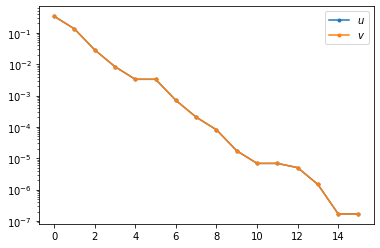

In [3]:
plt.semilogy(swe.Ku_vals, ".-", label="$u$")
plt.semilogy(swe.Kv_vals, ".-", label="$v$")
plt.legend()
plt.show()

In [4]:
t = 0.
t_final = 1.
nt = np.int32(np.round(t_final / control["dt"]))

for i in trange(nt):
    t += swe.dt
    swe.inlet_velocity.t = t
    swe.prediction_step(t)
    swe.set_prev()

  1%|█                                                                                                         | 1/100 [00:00<00:19,  5.10it/s]

  0 SNES Function norm 2.615957698381e-05 
  1 SNES Function norm 3.314779219564e-14 
  0 SNES Function norm 2.615956062086e-05 
  1 SNES Function norm 3.707368213230e-14 


  3%|███▏                                                                                                      | 3/100 [00:00<00:15,  6.25it/s]

  0 SNES Function norm 2.616019424885e-05 
  1 SNES Function norm 4.323912255357e-14 
  0 SNES Function norm 2.616270825411e-05 
  1 SNES Function norm 4.992704272564e-14 


  5%|█████▎                                                                                                    | 5/100 [00:00<00:14,  6.52it/s]

  0 SNES Function norm 2.616807921842e-05 
  1 SNES Function norm 5.641190181483e-14 
  0 SNES Function norm 2.617665201724e-05 
  1 SNES Function norm 6.319096668716e-14 


  7%|███████▍                                                                                                  | 7/100 [00:01<00:13,  6.69it/s]

  0 SNES Function norm 2.618801660705e-05 
  1 SNES Function norm 7.149240912044e-14 
  0 SNES Function norm 2.620113486923e-05 
  1 SNES Function norm 8.187689953632e-14 


  9%|█████████▌                                                                                                | 9/100 [00:01<00:13,  6.67it/s]

  0 SNES Function norm 2.621466444868e-05 
  1 SNES Function norm 9.304347251278e-14 
  0 SNES Function norm 2.622736603929e-05 
  1 SNES Function norm 1.021251801201e-13 


 11%|███████████▌                                                                                             | 11/100 [00:01<00:13,  6.52it/s]

  0 SNES Function norm 2.623845093659e-05 
  1 SNES Function norm 1.060122945465e-13 
  0 SNES Function norm 2.624774946103e-05 
  1 SNES Function norm 1.026953818009e-13 


 13%|█████████████▋                                                                                           | 13/100 [00:02<00:13,  6.50it/s]

  0 SNES Function norm 2.625565209972e-05 
  1 SNES Function norm 9.234437839487e-14 
  0 SNES Function norm 2.626286509799e-05 
  1 SNES Function norm 7.838822327412e-14 


 15%|███████████████▊                                                                                         | 15/100 [00:02<00:13,  6.36it/s]

  0 SNES Function norm 2.627009318887e-05 
  1 SNES Function norm 6.858125934646e-14 
  0 SNES Function norm 2.627778411999e-05 
  1 SNES Function norm 7.156471495720e-14 


 17%|█████████████████▊                                                                                       | 17/100 [00:02<00:12,  6.52it/s]

  0 SNES Function norm 2.628603322771e-05 
  1 SNES Function norm 8.578966566990e-14 
  0 SNES Function norm 2.629466804237e-05 
  1 SNES Function norm 1.018560681037e-13 


 19%|███████████████████▉                                                                                     | 19/100 [00:02<00:12,  6.43it/s]

  0 SNES Function norm 2.630344907366e-05 
  1 SNES Function norm 1.124556634674e-13 
  0 SNES Function norm 2.631227298651e-05 
  1 SNES Function norm 1.140070186460e-13 


 21%|██████████████████████                                                                                   | 21/100 [00:03<00:12,  6.44it/s]

  0 SNES Function norm 2.632127145462e-05 
  1 SNES Function norm 1.060302033881e-13 
  0 SNES Function norm 2.633075792886e-05 
  1 SNES Function norm 9.109209121557e-14 


 23%|████████████████████████▏                                                                                | 23/100 [00:03<00:12,  6.26it/s]

  0 SNES Function norm 2.634105459522e-05 
  1 SNES Function norm 7.547313525242e-14 
  0 SNES Function norm 2.635229242722e-05 
  1 SNES Function norm 6.904179262701e-14 


 25%|██████████████████████████▎                                                                              | 25/100 [00:03<00:11,  6.36it/s]

  0 SNES Function norm 2.636428904919e-05 
  1 SNES Function norm 7.702367298440e-14 
  0 SNES Function norm 2.637656840385e-05 
  1 SNES Function norm 9.220197708092e-14 


 27%|████████████████████████████▎                                                                            | 27/100 [00:04<00:11,  6.43it/s]

  0 SNES Function norm 2.638851570034e-05 
  1 SNES Function norm 1.051215238023e-13 
  0 SNES Function norm 2.639959689085e-05 
  1 SNES Function norm 1.104329570896e-13 


 29%|██████████████████████████████▍                                                                          | 29/100 [00:04<00:11,  6.40it/s]

  0 SNES Function norm 2.640954434090e-05 
  1 SNES Function norm 1.063983819624e-13 
  0 SNES Function norm 2.641842981518e-05 
  1 SNES Function norm 9.431334097097e-14 


 31%|████████████████████████████████▌                                                                        | 31/100 [00:04<00:10,  6.41it/s]

  0 SNES Function norm 2.642660012172e-05 
  1 SNES Function norm 7.878832029323e-14 
  0 SNES Function norm 2.643451288476e-05 
  1 SNES Function norm 6.834779685576e-14 


 33%|██████████████████████████████████▋                                                                      | 33/100 [00:05<00:10,  6.24it/s]

  0 SNES Function norm 2.644255168474e-05 
  1 SNES Function norm 7.120400887113e-14 
  0 SNES Function norm 2.645090357400e-05 
  1 SNES Function norm 8.454978949616e-14 


 35%|████████████████████████████████████▊                                                                    | 35/100 [00:05<00:10,  6.41it/s]

  0 SNES Function norm 2.645954759034e-05 
  1 SNES Function norm 9.881585138960e-14 
  0 SNES Function norm 2.646834732997e-05 
  1 SNES Function norm 1.072751801362e-13 


 37%|██████████████████████████████████████▊                                                                  | 37/100 [00:05<00:09,  6.43it/s]

  0 SNES Function norm 2.647719050733e-05 
  1 SNES Function norm 1.070300384884e-13 
  0 SNES Function norm 2.648609777100e-05 
  1 SNES Function norm 9.823813234703e-14 


 39%|████████████████████████████████████████▉                                                                | 39/100 [00:06<00:11,  5.49it/s]

  0 SNES Function norm 2.649524170956e-05 
  1 SNES Function norm 8.403186915730e-14 
  0 SNES Function norm 2.650486535261e-05 
  1 SNES Function norm 7.102876239383e-14 


 41%|███████████████████████████████████████████                                                              | 41/100 [00:06<00:11,  5.00it/s]

  0 SNES Function norm 2.651514282966e-05 
  1 SNES Function norm 6.799071491931e-14 
  0 SNES Function norm 2.652605580127e-05 
  1 SNES Function norm 7.712919798607e-14 


 43%|█████████████████████████████████████████████▏                                                           | 43/100 [00:07<00:11,  4.92it/s]

  0 SNES Function norm 2.653735206513e-05 
  1 SNES Function norm 9.086071718486e-14 
  0 SNES Function norm 2.654861162594e-05 
  1 SNES Function norm 1.014116814347e-13 


 45%|███████████████████████████████████████████████▎                                                         | 45/100 [00:07<00:10,  5.40it/s]

  0 SNES Function norm 2.655939228302e-05 
  1 SNES Function norm 1.046968495366e-13 
  0 SNES Function norm 2.656938865524e-05 
  1 SNES Function norm 9.977199452109e-14 


 47%|█████████████████████████████████████████████████▎                                                       | 47/100 [00:07<00:09,  5.74it/s]

  0 SNES Function norm 2.657853371202e-05 
  1 SNES Function norm 8.843300044937e-14 
  0 SNES Function norm 2.658700086280e-05 
  1 SNES Function norm 7.540014493878e-14 


 49%|███████████████████████████████████████████████████▍                                                     | 49/100 [00:08<00:09,  5.30it/s]

  0 SNES Function norm 2.659511169803e-05 
  1 SNES Function norm 6.810448066603e-14 
  0 SNES Function norm 2.660319656719e-05 
  1 SNES Function norm 7.188073238878e-14 


 51%|█████████████████████████████████████████████████████▌                                                   | 51/100 [00:08<00:09,  5.41it/s]

  0 SNES Function norm 2.661147330875e-05 
  1 SNES Function norm 8.320422359096e-14 
  0 SNES Function norm 2.661999664301e-05 
  1 SNES Function norm 9.450996673293e-14 


 53%|███████████████████████████████████████████████████████▋                                                 | 53/100 [00:08<00:08,  5.42it/s]

  0 SNES Function norm 2.662869423575e-05 
  1 SNES Function norm 1.006072580171e-13 
  0 SNES Function norm 2.663746287637e-05 
  1 SNES Function norm 9.941162663997e-14 


 55%|█████████████████████████████████████████████████████████▊                                               | 55/100 [00:09<00:08,  5.56it/s]

  0 SNES Function norm 2.664626970104e-05 
  1 SNES Function norm 9.148644982940e-14 
  0 SNES Function norm 2.665520250210e-05 
  1 SNES Function norm 7.996851851222e-14 


 57%|███████████████████████████████████████████████████████████▊                                             | 57/100 [00:09<00:08,  5.21it/s]

  0 SNES Function norm 2.666444046349e-05 
  1 SNES Function norm 7.057034475610e-14 
  0 SNES Function norm 2.667415886113e-05 
  1 SNES Function norm 6.940454351332e-14 


 59%|█████████████████████████████████████████████████████████████▉                                           | 59/100 [00:09<00:08,  4.96it/s]

  0 SNES Function norm 2.668441708871e-05 
  1 SNES Function norm 7.693642734669e-14 
  0 SNES Function norm 2.669509005972e-05 
  1 SNES Function norm 8.742643190899e-14 


 61%|████████████████████████████████████████████████████████████████                                         | 61/100 [00:10<00:07,  5.32it/s]

  0 SNES Function norm 2.670588247756e-05 
  1 SNES Function norm 9.514138810744e-14 
  0 SNES Function norm 2.671642405254e-05 
  1 SNES Function norm 9.702473574710e-14 


 63%|██████████████████████████████████████████████████████████████████▏                                      | 63/100 [00:10<00:06,  5.55it/s]

  0 SNES Function norm 2.672640313009e-05 
  1 SNES Function norm 9.259972924397e-14 
  0 SNES Function norm 2.673567743972e-05 
  1 SNES Function norm 8.371411685337e-14 


 65%|████████████████████████████████████████████████████████████████████▎                                    | 65/100 [00:10<00:05,  5.98it/s]

  0 SNES Function norm 2.674431279724e-05 
  1 SNES Function norm 7.441481758588e-14 
  0 SNES Function norm 2.675253624365e-05 
  1 SNES Function norm 6.995435009424e-14 


 67%|██████████████████████████████████████████████████████████████████████▎                                  | 67/100 [00:11<00:05,  6.25it/s]

  0 SNES Function norm 2.676063042939e-05 
  1 SNES Function norm 7.309715188677e-14 
  0 SNES Function norm 2.676882119454e-05 
  1 SNES Function norm 8.111687910187e-14 


 69%|████████████████████████████████████████████████████████████████████████▍                                | 69/100 [00:11<00:04,  6.29it/s]

  0 SNES Function norm 2.677720930115e-05 
  1 SNES Function norm 8.896219422360e-14 
  0 SNES Function norm 2.678577247791e-05 
  1 SNES Function norm 9.299086959775e-14 


 71%|██████████████████████████████████████████████████████████████████████████▌                              | 71/100 [00:11<00:04,  6.22it/s]

  0 SNES Function norm 2.679442854774e-05 
  1 SNES Function norm 9.179594544680e-14 
  0 SNES Function norm 2.680312148879e-05 
  1 SNES Function norm 8.604345053817e-14 


 73%|████████████████████████████████████████████████████████████████████████████▋                            | 73/100 [00:12<00:04,  6.37it/s]

  0 SNES Function norm 2.681188291291e-05 
  1 SNES Function norm 7.827377471254e-14 
  0 SNES Function norm 2.682083535718e-05 
  1 SNES Function norm 7.239041633426e-14 


 75%|██████████████████████████████████████████████████████████████████████████████▊                          | 75/100 [00:12<00:03,  6.48it/s]

  0 SNES Function norm 2.683013407364e-05 
  1 SNES Function norm 7.177892334422e-14 
  0 SNES Function norm 2.683987617354e-05 
  1 SNES Function norm 7.643706151036e-14 


 77%|████████████████████████████████████████████████████████████████████████████████▊                        | 77/100 [00:12<00:03,  6.39it/s]

  0 SNES Function norm 2.685002425985e-05 
  1 SNES Function norm 8.307250200845e-14 
  0 SNES Function norm 2.686038645297e-05 
  1 SNES Function norm 8.808258232455e-14 


 79%|██████████████████████████████████████████████████████████████████████████████████▉                      | 79/100 [00:13<00:03,  6.23it/s]

  0 SNES Function norm 2.687066781118e-05 
  1 SNES Function norm 8.936254044903e-14 
  0 SNES Function norm 2.688057272681e-05 
  1 SNES Function norm 8.660142735125e-14 


 81%|█████████████████████████████████████████████████████████████████████████████████████                    | 81/100 [00:13<00:03,  5.89it/s]

  0 SNES Function norm 2.688991208075e-05 
  1 SNES Function norm 8.113222756311e-14 
  0 SNES Function norm 2.689866622899e-05 
  1 SNES Function norm 7.556642894408e-14 


 83%|███████████████████████████████████████████████████████████████████████████████████████▏                 | 83/100 [00:13<00:02,  6.04it/s]

  0 SNES Function norm 2.690697662358e-05 
  1 SNES Function norm 7.280372499501e-14 
  0 SNES Function norm 2.691507353732e-05 
  1 SNES Function norm 7.420276546456e-14 


 85%|█████████████████████████████████████████████████████████████████████████████████████████▎               | 85/100 [00:14<00:02,  6.09it/s]

  0 SNES Function norm 2.692317705692e-05 
  1 SNES Function norm 7.850693565355e-14 
  0 SNES Function norm 2.693141863969e-05 
  1 SNES Function norm 8.307326720072e-14 


 87%|███████████████████████████████████████████████████████████████████████████████████████████▎             | 87/100 [00:14<00:02,  5.95it/s]

  0 SNES Function norm 2.693981719543e-05 
  1 SNES Function norm 8.569552457925e-14 
  0 SNES Function norm 2.694831485427e-05 
  1 SNES Function norm 8.540836224209e-14 


 89%|█████████████████████████████████████████████████████████████████████████████████████████████▍           | 89/100 [00:14<00:01,  5.87it/s]

  0 SNES Function norm 2.695684820273e-05 
  1 SNES Function norm 8.254408746850e-14 
  0 SNES Function norm 2.696541477795e-05 
  1 SNES Function norm 7.848954425898e-14 


 91%|███████████████████████████████████████████████████████████████████████████████████████████████▌         | 91/100 [00:15<00:01,  6.05it/s]

  0 SNES Function norm 2.697409869359e-05 
  1 SNES Function norm 7.517091078902e-14 
  0 SNES Function norm 2.698304059558e-05 
  1 SNES Function norm 7.415387776814e-14 


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████▋       | 93/100 [00:15<00:01,  6.14it/s]

  0 SNES Function norm 2.699236534198e-05 
  1 SNES Function norm 7.570351938632e-14 
  0 SNES Function norm 2.700210268954e-05 
  1 SNES Function norm 7.869861133941e-14 


 95%|███████████████████████████████████████████████████████████████████████████████████████████████████▊     | 95/100 [00:15<00:00,  6.23it/s]

  0 SNES Function norm 2.701214146882e-05 
  1 SNES Function norm 8.150646854942e-14 
  0 SNES Function norm 2.702224330691e-05 
  1 SNES Function norm 8.288205933665e-14 


 97%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 97/100 [00:16<00:00,  6.29it/s]

  0 SNES Function norm 2.703211426114e-05 
  1 SNES Function norm 8.236858245178e-14 
  0 SNES Function norm 2.704150499738e-05 
  1 SNES Function norm 8.031612671546e-14 


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 99/100 [00:16<00:00,  6.21it/s]

  0 SNES Function norm 2.705029625143e-05 
  1 SNES Function norm 7.768020562296e-14 
  0 SNES Function norm 2.705853344146e-05 
  1 SNES Function norm 7.563039090150e-14 


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.00it/s]


In [5]:
print(np.sum(np.isnan(swe.J_scipy.todense())))
print(np.sum(np.isnan(swe.J_prev_scipy.todense())))

0
0


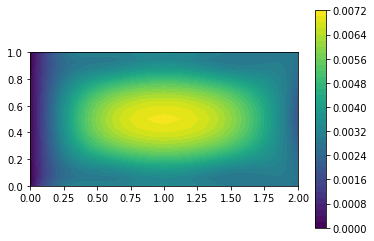

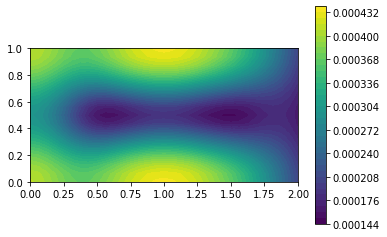

In [6]:
var = fe.Function(swe.W)
var_array = np.sqrt(np.sum(swe.cov_sqrt**2, axis=1))
var.vector().set_local(var_array)

vel, h = var.split()
u, v = vel.split()

im = fe.plot(u)
plt.colorbar(im)
plt.show()

im = fe.plot(h)
plt.colorbar(im)
plt.show()